In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# TRAINING DATA (100)
# 3,052,895 tokens
# 238,761 vocab items
# 12.8 tokens/vocab

# TRAINING DATA, LEMMATIZED (100)
# 3,052,895 tokens
# 47,800 vocab items
# 63.9 tokens/vocab

file={
#     "ordered_train(100_i)_test(100_i)_a0.1": ['LM_n3_(TURKISH_small)_a0.1_OI_train(100)_test(100).txt'],
#     "ordered_train(100_i)_test(100_i)_a0": ['LM_n3_(TURKISH_small)_a0_OI_train(100)_test(100).txt'],
    "ordered_train(90_i)_test(10_i)_a0.1": ['LM_n3_(TURKISH_small)_a0.1_OI_train(90)_test(10).txt'],
#     "random_train(90_o)_test(10_i)_a0.1": ['LM_n3_(TURKISH_small)_a0.1_R_train(90_o)_test(10_i).txt'],
    "ordered_lemmatized_train(90_o)_test(10_i)_a0.1": ['LM_n3_(TURKISH_small_lemmatized)_a0_OI_train(90)_test(10).txt'],
    "(leipzig_0.1)ordered_lemmatized_train(90_o)_test(10_i)_a0.1": ['LM_n3_(TURKISH_leipzig_lemmatized)_a0.1_OI_train(90)_test(10).txt'],
    "(leipzig_0.01)ordered_lemmatized_train(90_o)_test(10_i)_a0.01": ['LM_n3_(TURKISH_leipzig_lemmatized)_a0.01_OI_train(90)_test(10).txt'],
    "(leipzig_0.5)ordered_lemmatized_train(90_o)_test(10_i)_a0.5": ['LM_n3_(TURKISH_leipzig_lemmatized)_a0.5_OI_train(90)_test(10).txt'],
    "(leipzig_1)ordered_lemmatized_train(90_o)_test(10_i)_a1": ['LM_n3_(TURKISH_leipzig_lemmatized)_a1_OI_train(90)_test(10).txt'],
    "(lm_1)ordered_lemmatized_train(90_o)_test(10_i)": ['LM_n3_(TURKISH_leipzig_lm)_a1_OI_train(90)_test(10).txt'],
    "ordered_lemmatized_train(100)_test(100)" : ['LM_n3_(TURKISH_small_lemmatized)_a0.1_OI_train(100)_test(100).txt'],
    "lm(100)_a1_ordered_90_10": ['LM_n3_(TURKISH_lm_100)_a1_OI_train(90)_test(10).txt'],
    "(leipzig_NEWS_lemmatized)_a1_ordered_90_10": ['LM_n3_(TURKISH_leipzig(news)_lemmatized_100)_a1_OI_train(90)_test(10).txt'],
    "(leipzig_NEWS)_a1_ordered_90_10": ['LM_n3_(TURKISH_leipzig(news)_100)_a1_OI_train(90)_test(10)(1).txt'],

}

df_all = pd.DataFrame(columns=['name','window_size', 'perplexity','prob_words','h_words', 'h_wordset', 'h_wordorder', 'entropy_rate', 'unordered_entropy_rate', 'entropy_rate_difference','zeros_permutations'])
c = 0
for k,v in file.items():
    df = pd.read_csv(file[k][0])
#     if k[len(k)-2:len(k)-1] == str(4):
#         df['word_count'] = pd.Series([576673,576673,576673,576673,576673])
#     elif k[len(k)-3:len(k)-1] == str(10):
#         df['word_count'] = pd.Series([1313930,1313930,1313930,1313930,1313930])
#     elif k[len(k)-3:len(k)-1] == str(50):
#         df['word_count'] = pd.Series([6407228,6407228,6407228,6407228,6407228])
#     else:
#         df['word_count'] = pd.Series([0,0,0,0,0])
    
    df['prob_words'] = pd.Series(2**(-df['h_words']))
    df['window_size'] =  pd.Series([1,2,3,4,5])
    df['name'] = pd.Series([k,k,k,k,k])
    df['h_wordorder'] = pd.Series(df['h_words'] - df['h_wordset'])
    df['entropy_rate'] = pd.Series(df['h_words'] / df['window_size'])
    df['perplexity'] = pd.Series(2**df['entropy_rate'])
    df['unordered_entropy_rate'] = pd.Series(df['h_wordset'] / df['window_size'])
    df['entropy_rate_difference'] = pd.Series((df['h_words'] - df['h_wordset']) / df['window_size'])
#     df['perplexity'] = pd.Series(df['prob_words']**(-1/df['word_count']))
    del df['Unnamed: 0']
    for i in range(5):
        df_all.loc[5*c + i] = df.loc[i]
#     if c == 0:
#         print(df)
    c+=1

# df_all[df_all['name'] == ('oi_a0.1')]
df_all


,name,window_size,perplexity,prob_words,h_words,h_wordset,h_wordorder,entropy_rate,unordered_entropy_rate,entropy_rate_difference,zeros_permutations
0,ordered_train(90_i)_test(10_i)_a0.1,1,1077.691943,9.279090e-04,10.073729,10.073729,0.000000,10.073729,10.073729,0.000000,NaN
1,ordered_train(90_i)_test(10_i)_a0.1,2,1357.131083,5.429457e-07,20.812689,19.213927,1.598762,10.406344,9.606963,0.799381,NaN
2,ordered_train(90_i)_test(10_i)_a0.1,3,1994.800471,1.259800e-10,32.886086,29.078878,3.807208,10.962029,9.692959,1.269069,NaN
3,ordered_train(90_i)_test(10_i)_a0.1,4,2424.811085,2.892600e-14,44.974627,39.098182,5.876445,11.243657,9.774546,1.469111,NaN
4,ordered_train(90_i)_test(10_i)_a0.1,5,2731.427566,6.577359e-18,57.077197,49.139995,7.937202,11.415439,9.827999,1.587440,NaN
5,ordered_lemmatized_train(90_o)_test(10_i)_a0.1,1,143574.403633,6.965030e-06,17.131439,17.131439,0.000000,17.131439,17.131439,0.000000,NaN
6,ordered_lemmatized_train(90_o)_test(10_i)_a0.1,2,15860.053103,3.975491e-09,27.906220,27.213073,0.693147,13.953110,13.606536,0.346574,NaN
7,ordered_lemmatized_train(90_o)_test(10_i)_a0.1,3,7609.927322,2.269125e-12,38.681001,36.889241,1.791759,12.893667,12.296414,0.597253,NaN
8,ordered_lemmatized_train(90_o)_test(10_i)_a0.1,4,5271.308638,1.295168e-15,49.455782,46.277728,3.178054,12.363945,11.569432,0.794513,NaN
9,ordered_lemmatized_train(90_o)_test(10_i)_a0.1,5,4229.034292,7.392545e-19,60.230563,55.443071,4.787492,12.046113,11.088614,0.957498,NaN


In [16]:
# Compare h_words/h_wordset and word order

name = 
# name = "oi_a0.1_90_10_TURKISH"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

SyntaxError: invalid syntax (<ipython-input-16-afcfde0fa30b>, line 3)

TypeError: no numeric data to plot

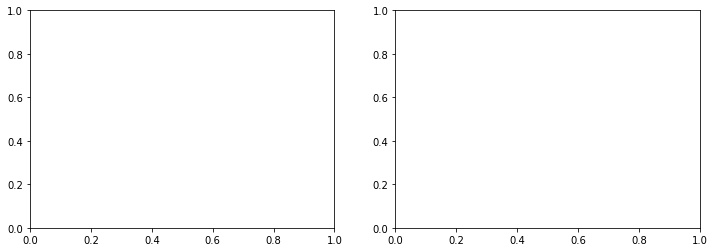

In [19]:
# Compare h_words/h_wordset and word order
name = "ordered_train(90_i)_test(10_i)_a0.1"
name = "(leipzig)ordered_lemmatized_train(90_o)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "ordered_lemmatized_train(90_o)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

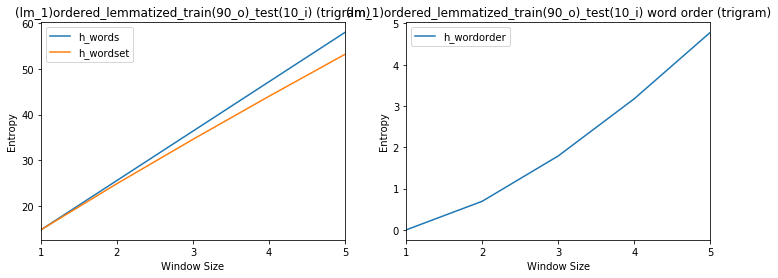

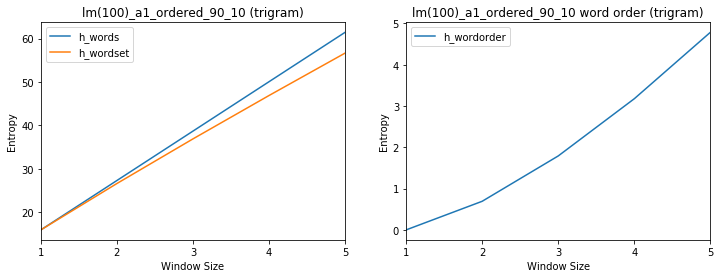

In [10]:
# Compare h_words/h_wordset and word order
name = "(lm_1)ordered_lemmatized_train(90_o)_test(10_i)"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "lm(100)_a1_ordered_90_10"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

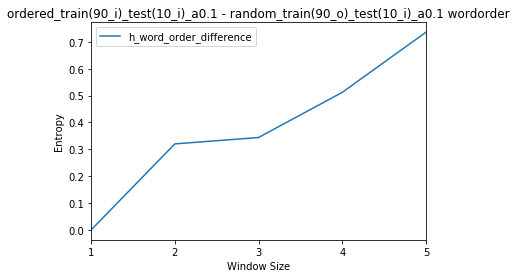

In [5]:
# Compare ordered and random wordorder difference

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
name1 = "ordered_train(90_i)_test(10_i)_a0.1"
df1 = df_all[df_all['name'] == name1].copy().reset_index(drop=True)

name2 = "random_train(90_o)_test(10_i)_a0.1"
df2 = df_all[df_all['name'] == name2].copy().reset_index(drop=True)

df['h_word_order_difference'] = df2['h_wordorder'] - df1['h_wordorder']
# df['h_word_order_difference'] = df1['h_wordorder'] - df2['h_wordorder']

# axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name2 + " - " + name1 +" wordorder")
axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name1 + " - " + name2 +" wordorder")
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

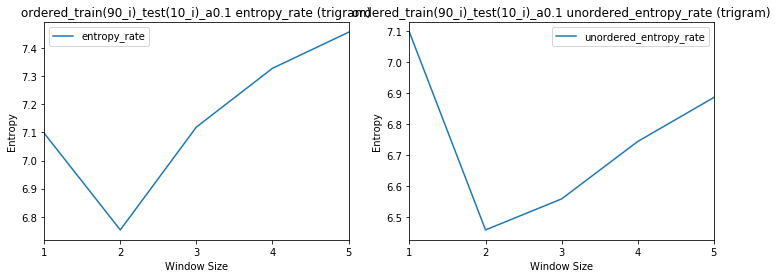

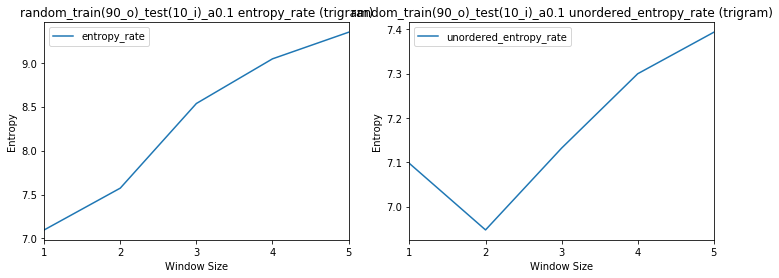

In [13]:
# Compare ordered and unordered entropy rates for random and ordered LM
# as window_size increases, on average there is more entropy per word (LESS INFORMATION)

base = 'i_a0.1_90_10'

name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "random_train(90_o)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

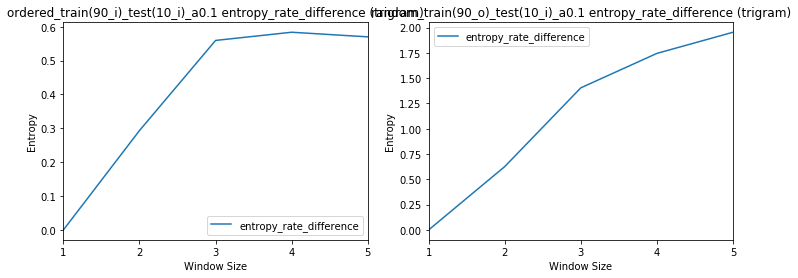

In [14]:
# Compare ordered and unordered entropy rates for random and ordered LM


name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

name2 = "random_train(90_o)_test(10_i)_a0.1"
df2 = df_all[df_all['name'] == name2].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate_difference"], title=name+" entropy_rate_difference (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df2.plot(x="window_size", y=['entropy_rate_difference'], title=name2+" entropy_rate_difference (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


[]

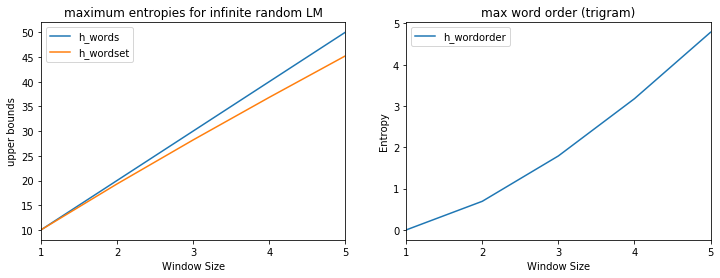

In [11]:
# Get entropy upper bounds given an infinite random LM

import scipy.special

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
# df['h_words'] = 9.781669 * df['window_size'] 
df['h_words'] = 10.001012 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
df['h_wordorder'] = df["h_words"] - df['h_wordset']

fig, ax = plt.subplots(ncols=2,figsize=(12,4))

a = df.plot(x="window_size", y=['h_words', 'h_wordset'], title="maximum entropies for infinite random LM", ax=ax[0])
a.set(xlabel="Window Size", ylabel="upper bounds")
a.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title="max word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()